<a href="https://colab.research.google.com/github/shyamsagar651/cardiovascular-risk-prediction-sam/blob/main/Cardiovascular_Risk_Predictionsam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

###Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

###Data Description
**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

### Importing Required Libararies


In [ ]:
#Importing Required Libararies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample 
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.impute import KNNImputer

In [ ]:
# Connecting colab to google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Loading Data file 


In [ ]:
# Imprtig data from google drive
df=pd.read_csv('/content/drive/MyDrive/project/cardiovascular/data_cardiovascular_risk.csv')

In [ ]:
# Checking the data columns and values for some rows
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# List of columns
list(df.columns)

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
# Number of rows and columns of data 
df.shape

(3390, 17)

In [ ]:
# Information about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# data related statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [ ]:
# Checking if data contains null values.
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Replacing string categorical value with nuumerical calue 0 or 1
df['sex']= df['sex'].replace({'F':1, 'M':0})
df['is_smoking']= df['is_smoking'].replace({'YES':1,'NO':0})

In [ ]:
df.drop(['id'], axis=1,inplace=True)

### Imputing null values using KNN imputer

In [ ]:
# Imputig missing values using KNN imputer for continuous variables
cts= ['age','cigsPerDay', 'totChol','sysBP','diaBP','BMI','heartRate','glucose']
imputer = KNNImputer(n_neighbors=3)
df[cts]= imputer.fit_transform(df[cts])

In [ ]:
# imputing missing values using KNN imputer for categorical variables
from sklearn.impute import SimpleImputer
category = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
frequent= SimpleImputer(strategy="most_frequent")
df[category] = frequent.fit_transform(df[category])

In [ ]:
# Data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   float64
 1   education        3390 non-null   float64
 2   sex              3390 non-null   float64
 3   is_smoking       3390 non-null   float64
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   float64
 7   prevalentHyp     3390 non-null   float64
 8   diabetes         3390 non-null   float64
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 423.9 KB


In [ ]:
#  data related statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3390.0,1.946018,1.017568,1.00,1.00,2.00,3.00,4.0
sex,3390.0,0.567257,0.495529,0.00,0.00,1.00,1.00,1.0
is_smoking,3390.0,0.497640,0.500068,0.00,0.00,0.00,1.00,1.0
cigsPerDay,3390.0,9.073648,11.855099,0.00,0.00,0.00,20.00,70.0
BPMeds,3390.0,0.029499,0.169224,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3390.0,237.073353,45.070710,107.00,206.00,234.00,264.00,696.0


In [ ]:
# checking if data contains null values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##Exploratory Data Analysis

Text(0.5, 0, 'age')

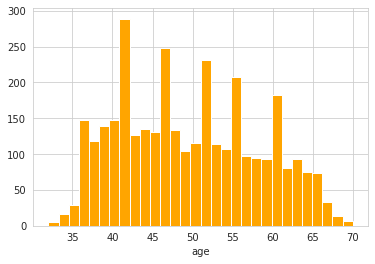

In [ ]:
sns.set_style('whitegrid')
df['age'].hist(bins=30, color='orange')
plt.xlabel('age')

###Jointplot Age versus different columns.

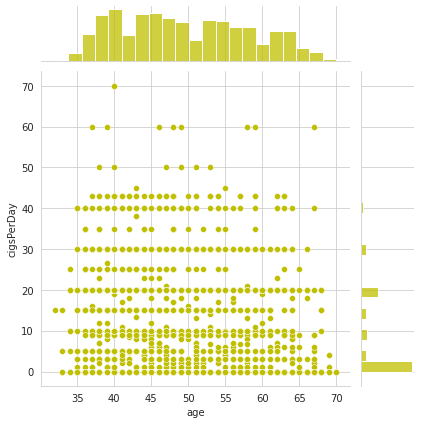

In [ ]:
#plot for age and cigarette per day
sns.jointplot(x='age', y='cigsPerDay',data=df, color='y')

###Most People smoke between 0 and 10 cigaettes a day.


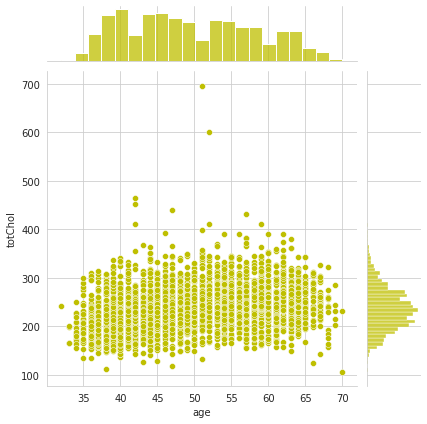

In [ ]:
# Plot for age and total cholesterol
sns.jointplot(x='age', y='totChol', data=df, color='y')

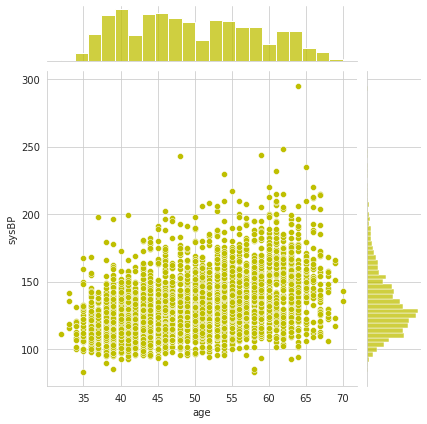

In [ ]:
# plot for age and BP
sns.jointplot(x='age', y='sysBP', data=df, color='y')

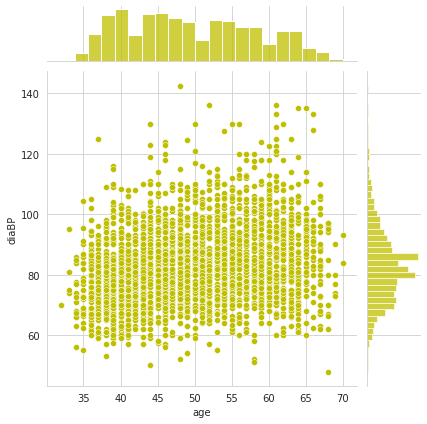

In [ ]:
#plot for age and diabetic
sns.jointplot(x='age', y='diaBP', data=df, color='y')

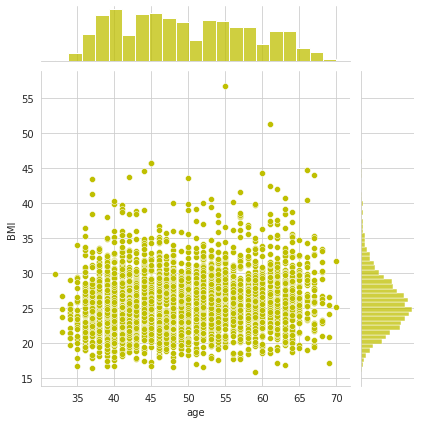

In [ ]:
 # plot for age and BMI
sns.jointplot(x='age', y='BMI', data=df, color='y')

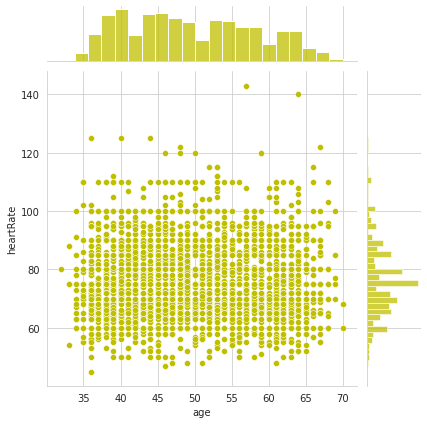

In [ ]:
 #plot for age and Heart Rate
sns.jointplot(x='age', y='heartRate', data=df, color='y')


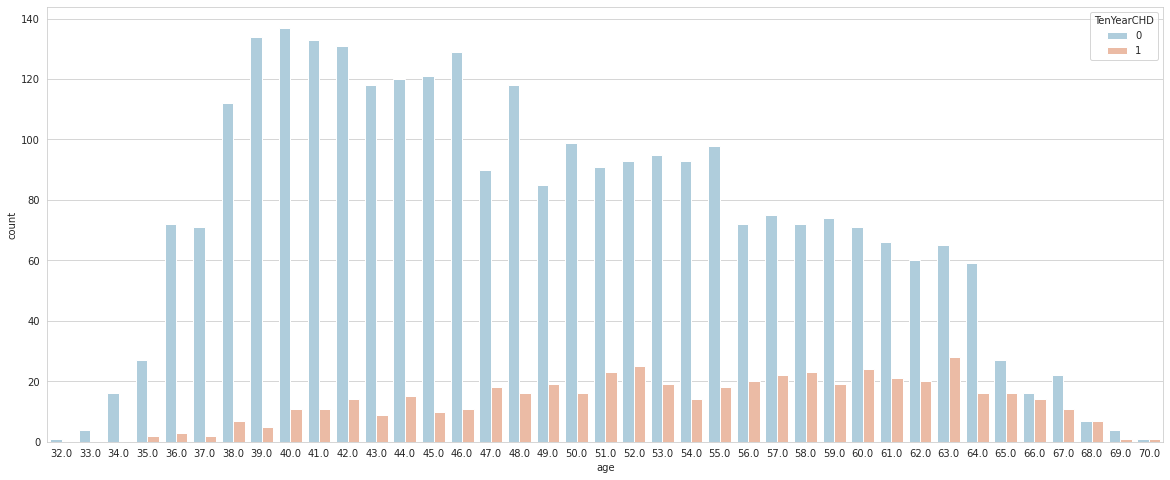

In [ ]:
# plot for age v/s TenYearCHD
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.countplot(x='age',hue='TenYearCHD',data= df,palette='RdBu_r')

#### Risk of coronary heart disease rises with age up to age 63 and then declines beyond that.

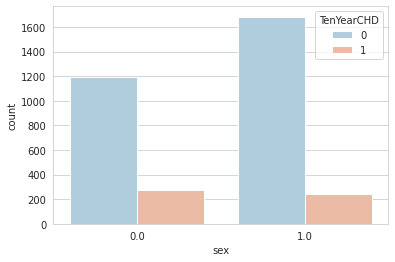

In [ ]:
#  Plot for sex v/s TenYearCHD
sns.set_style('whitegrid')
sns.countplot(x='sex', hue='TenYearCHD', data=df, palette='RdBu_r')

#### Compared to women, men are more likely to acquire coronary heart disease (CHD).

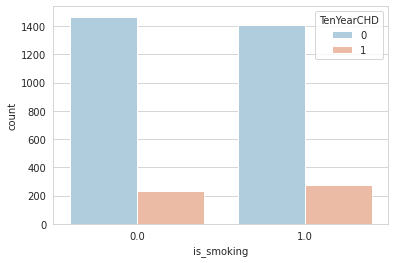

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='is_smoking', hue='TenYearCHD', data=df, palette='RdBu_r')

####compared to nonsmokers, smokers have a higher chance of developing coronary heart disease.

## Data Distribution for different target variable labels.

In [ ]:
# plotting data distribution for different columns
def plot(col_name):
  print('\033[1m Ten Year CHD Values for different '+col_name+'values')
  ax= df.hist(column=col_name, by = 'TenYearCHD', bins=30, color='violet')

 Ten Year CHD Values for different agevalues


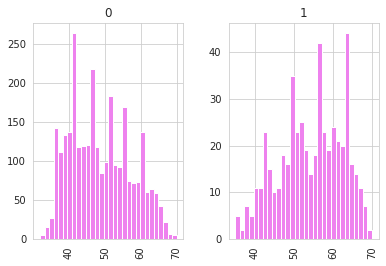

In [ ]:
# data distribution for age columns
plot('age')

 Ten Year CHD Values for different educationvalues


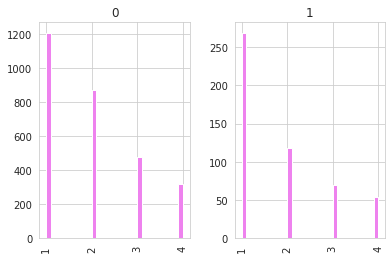

In [ ]:
# data distribution for education column
plot('education')

 Ten Year CHD Values for different sexvalues


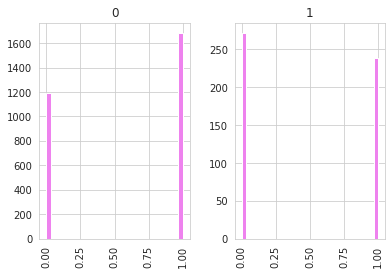

In [ ]:
# data distribution for sex column
plot('sex')

 Ten Year CHD Values for different is_smokingvalues


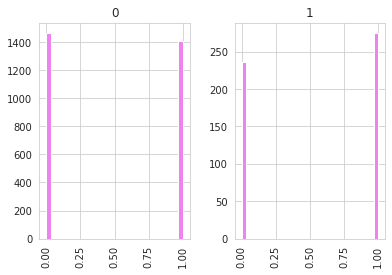

In [ ]:
# data distribution for is_smoking columns
plot('is_smoking')

 Ten Year CHD Values for different cigsPerDayvalues


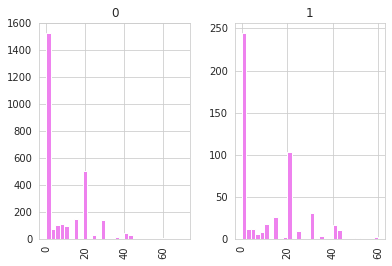

In [ ]:
# data distribution for cigsPerDay column
plot('cigsPerDay')

 Ten Year CHD Values for different BPMedsvalues


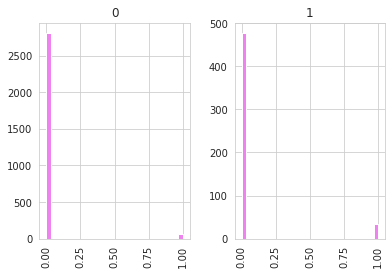

In [ ]:
# data distribution for BPMeds column
plot('BPMeds')

 Ten Year CHD Values for different prevalentStrokevalues


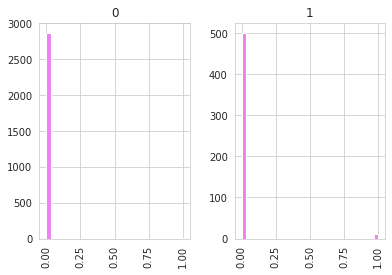

In [ ]:
# data distribution ofr prevalentStroke column
plot('prevalentStroke')

 Ten Year CHD Values for different prevalentHypvalues


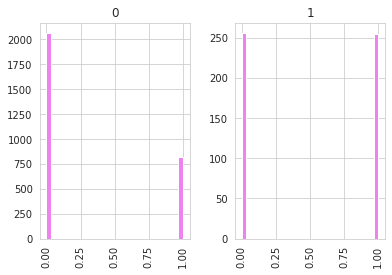

In [ ]:
# data distribution for prevalentHyp column
plot('prevalentHyp')

 Ten Year CHD Values for different diabetesvalues


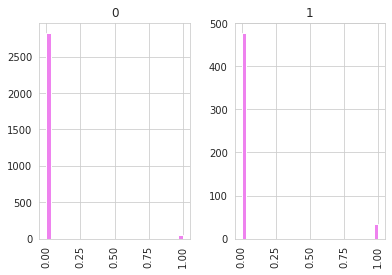

In [ ]:
# data distribution for diabetes column
plot('diabetes')

 Ten Year CHD Values for different totCholvalues


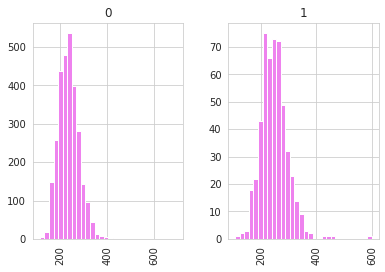

In [ ]:
# data distribution for total cholesterol column
plot('totChol')

 Ten Year CHD Values for different sysBPvalues


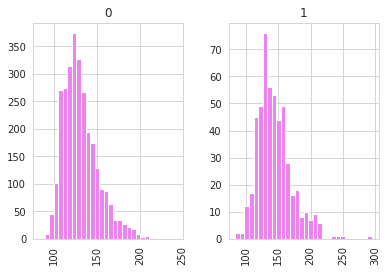

In [ ]:
# data distribution for total systolic blood pressure column
plot('sysBP')


 Ten Year CHD Values for different diaBPvalues


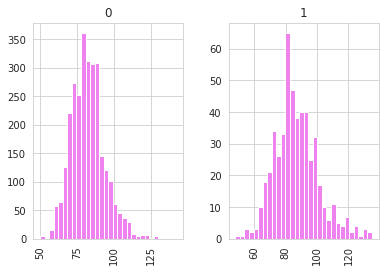

In [ ]:
# data distribution for diastolic blood pressure column
plot('diaBP')

 Ten Year CHD Values for different BMIvalues


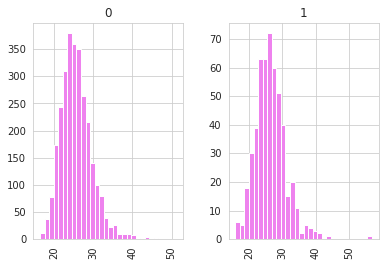

In [ ]:
# data distribution for Body Mass Index column
plot('BMI')

 Ten Year CHD Values for different heartRatevalues


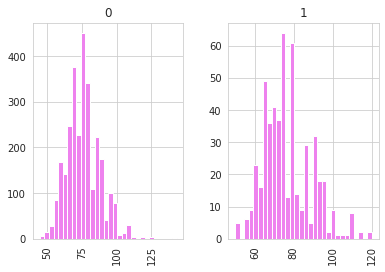

In [ ]:
# data distribution for heartrate column
plot('heartRate')

 Ten Year CHD Values for different glucosevalues


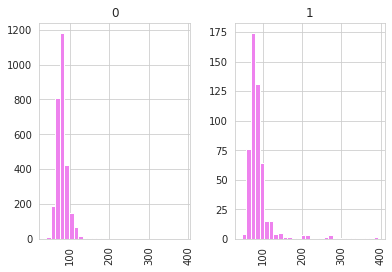

In [ ]:
# data distribution for glucose column
plot('glucose')

## Outliers Detection

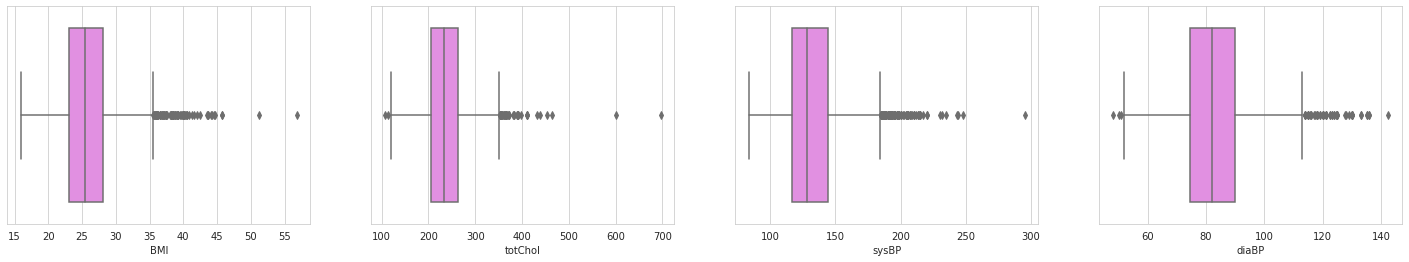

In [ ]:
# plotting different column values to check outliers
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=df['BMI'], ax=ax1, color='violet')
sns.boxplot(x=df['totChol'], ax=ax2, color='violet')
sns.boxplot(x=df['sysBP'], ax=ax3, color='violet')
sns.boxplot(x=df['diaBP'], ax=ax4, color= 'violet')

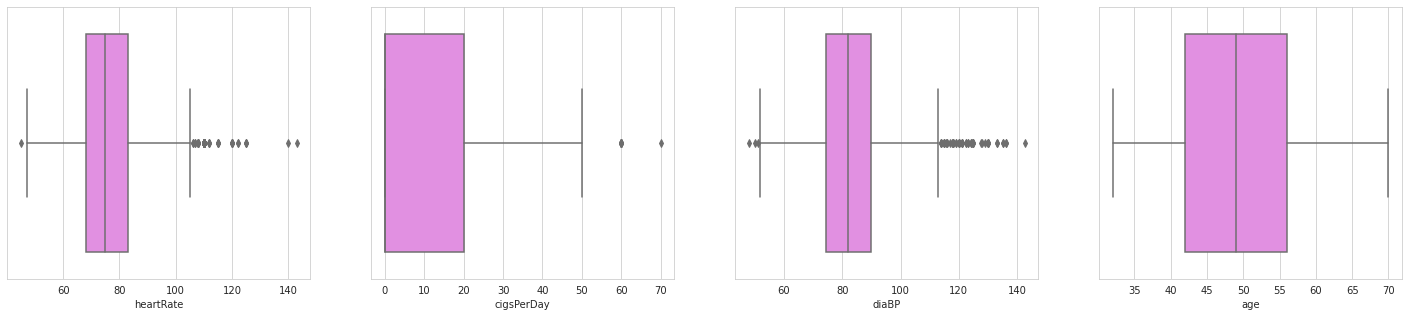

In [ ]:
# plotting different column values to check outliers
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,5))
sns.boxplot(x=df['heartRate'], ax=ax1, color='violet')
sns.boxplot(x=df['cigsPerDay'], ax=ax2, color='violet')
sns.boxplot(x=df['diaBP'], ax=ax3, color='violet')
sns.boxplot(x=df['age'], ax=ax4, color='violet')

### Treatment of outliers

In [ ]:
outlier_list= []

def outlier_detection(df):
  thres = 3
  mean= np.mean(df)
  std= np.std(df)
  for data_point in df:
    z_score = (data_point -mean)/std
    if (np.abs(z_score)> thres):
      outlier_list.append(data_point)
  return outlier_list

In [ ]:
cols = ['BMI', 'totChol', 'sysBP', 'glucose', 'heartRate', 'cigsPerDay', 'diaBP', 'age']
for col in cols:
  outlier_values = outlier_detection(df[col])
  print("number of  Outliers for feature {}: ".format(col), len(outlier_values))
  

number of  Outliers for feature BMI:  46
number of  Outliers for feature totChol:  65
number of  Outliers for feature sysBP:  104
number of  Outliers for feature glucose:  148
number of  Outliers for feature heartRate:  167
number of  Outliers for feature cigsPerDay:  184
number of  Outliers for feature diaBP:  220
number of  Outliers for feature age:  220


In [ ]:
 # Computing 10th, 90th percentiles and replacing the outliers
def treat_outliers(df):
  fifth_qunatile = df.quantile(0.05) 
  ninetyfive_qunatile  = df.quantile(0.95) 
  df.clip(fifth_qunatile, ninetyfive_qunatile, inplace=True)

for col in cols:
  treat_outliers(df[col])

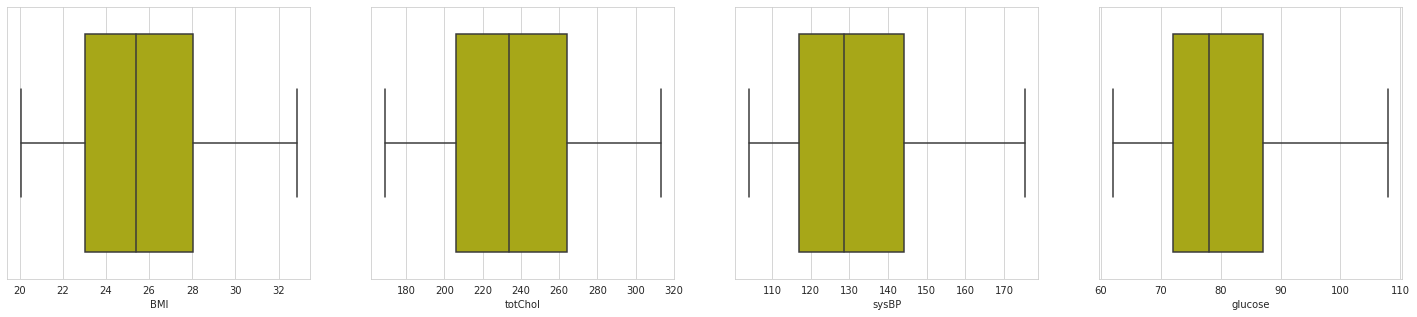

In [ ]:
# plotting different column values to check outliers if they exist or not 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,5))
sns.boxplot(x=df['BMI'],ax=ax1,color = 'y')
sns.boxplot(x=df['totChol'],ax=ax2,color = 'y')
sns.boxplot(x=df['sysBP'],ax=ax3,color = 'y')
sns.boxplot(x=df['glucose'],ax=ax4,color = 'y')

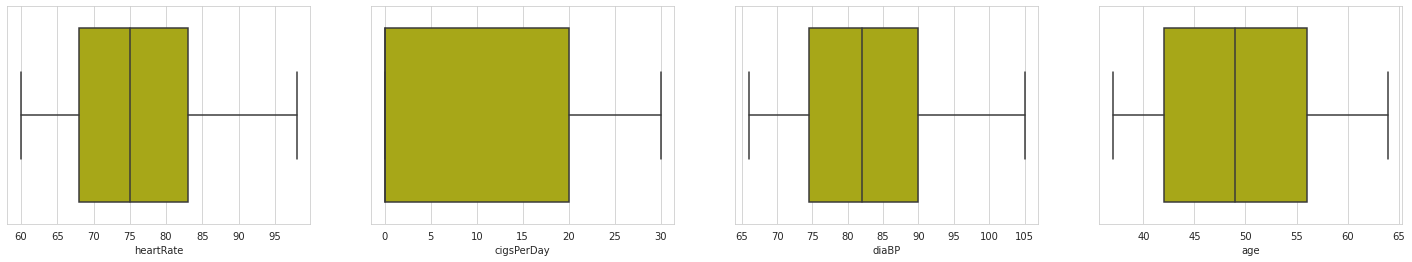

In [ ]:
 # plotting different column values to check outliers if they exist or not
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,4))
sns.boxplot(x=df['heartRate'],ax=ax1,color = 'y')
sns.boxplot(x=df['cigsPerDay'],ax=ax2,color = 'y')
sns.boxplot(x=df['diaBP'],ax=ax3,color = 'y')
sns.boxplot(x=df['age'],ax=ax4,color = 'y')

### Insights using feature engineering 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


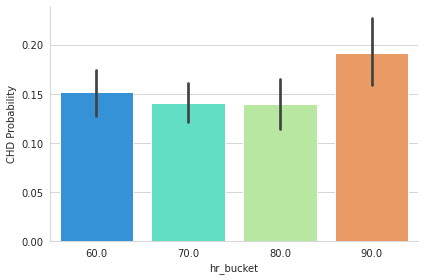

In [ ]:
df['hr_bucket']= df['heartRate'].apply(lambda x: 10*(x//10))
ax= sns.catplot('hr_bucket', 'TenYearCHD', kind='bar', data=df, height=4, aspect=1.5, palette='rainbow')
ax.set_ylabels('CHD Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


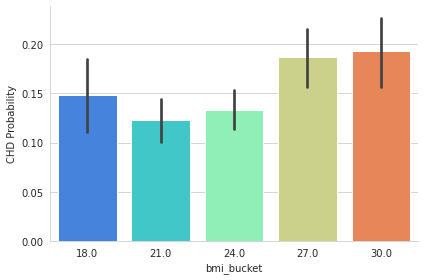

In [ ]:
df['bmi_bucket'] = df['BMI'].apply(lambda x : 3*(x//3))
ax = sns.catplot('bmi_bucket', 'TenYearCHD', kind='bar', data = df, height=4, aspect=1.5, palette='rainbow')
ax.set_ylabels('CHD Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


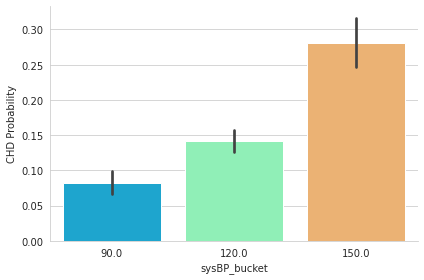

In [ ]:
df['sysBP_bucket'] = df['sysBP'].apply(lambda x : 30*(x//30))
ax = sns.catplot('sysBP_bucket', 'TenYearCHD', kind='bar', data = df, height=4, aspect=1.5, palette='rainbow')
ax.set_ylabels('CHD Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


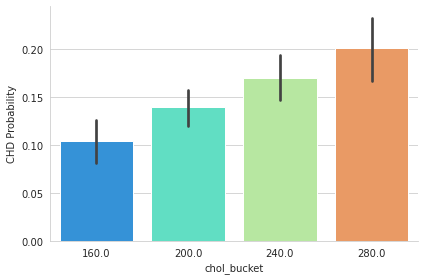

In [ ]:
df['chol_bucket'] = df['totChol'].apply(lambda x : 40*(x//40))
ax = sns.catplot('chol_bucket', 'TenYearCHD', kind='bar', data = df, height=4, aspect=1.5, palette='rainbow')
ax.set_ylabels('CHD Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


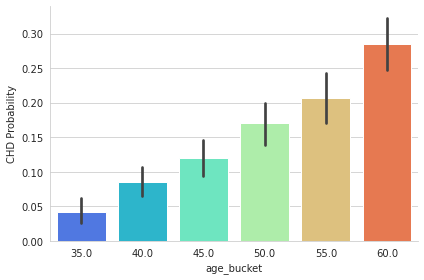

In [ ]:
df['age_bucket'] = df['age'].apply(lambda x : 5*(x//5))
ax=sns.catplot('age_bucket', 'TenYearCHD', kind='bar', data = df, height=4, aspect=1.5, palette='rainbow')
ax.set_ylabels('CHD Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


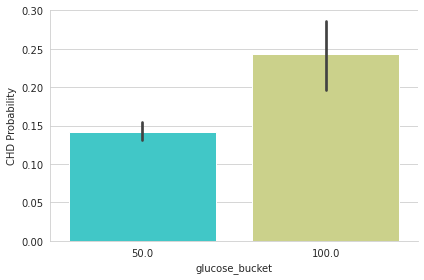

In [ ]:
df['glucose_bucket'] = df['glucose'].apply(lambda x : 50*(x//50))
ax = sns.catplot('glucose_bucket', 'TenYearCHD', kind='bar', data = df, height=4, aspect=1.5, palette='rainbow')
ax.set_ylabels('CHD Probability')

### Chcking collinearity between variables 

In [ ]:
X = ['age','education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
y = ['TenYearCHD'] 

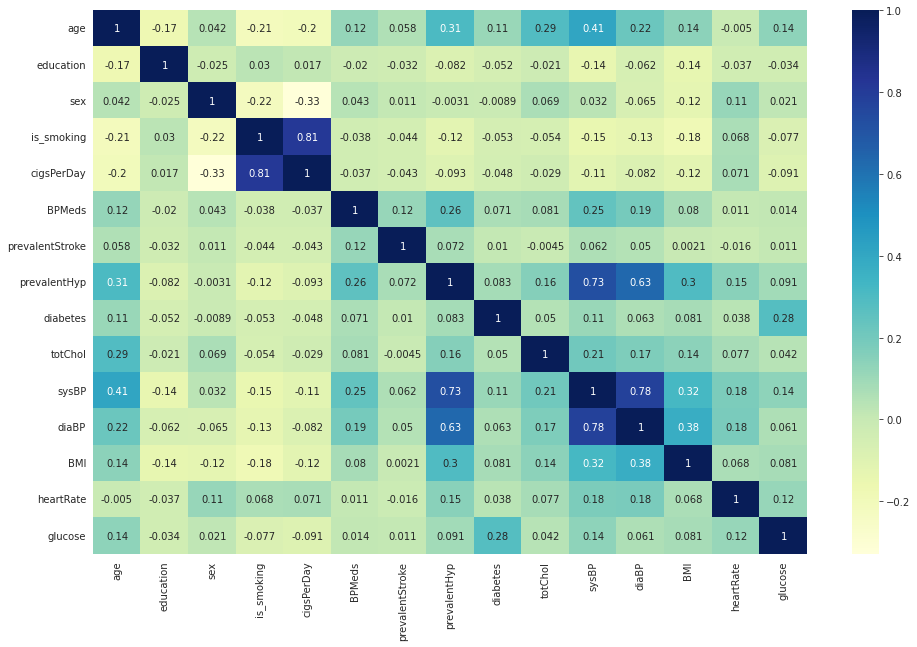

In [ ]:
# checking correlation between variables
correlation_calc = df[X].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_calc,  annot=True, cmap='YlGnBu')

In [ ]:
# dropping columns to remove rows which are combined 
df['plusePressure']= df['sysBP'] - df['diaBP']
df.drop(['diaBP'], axis=1, inplace=True)
df.drop(['sysBP'], axis=1, inplace=True)

In [ ]:
# dropping is_smoking column as cigsPerDay is highly correlated to it
df.drop(['is_smoking'],axis=1,inplace=True)

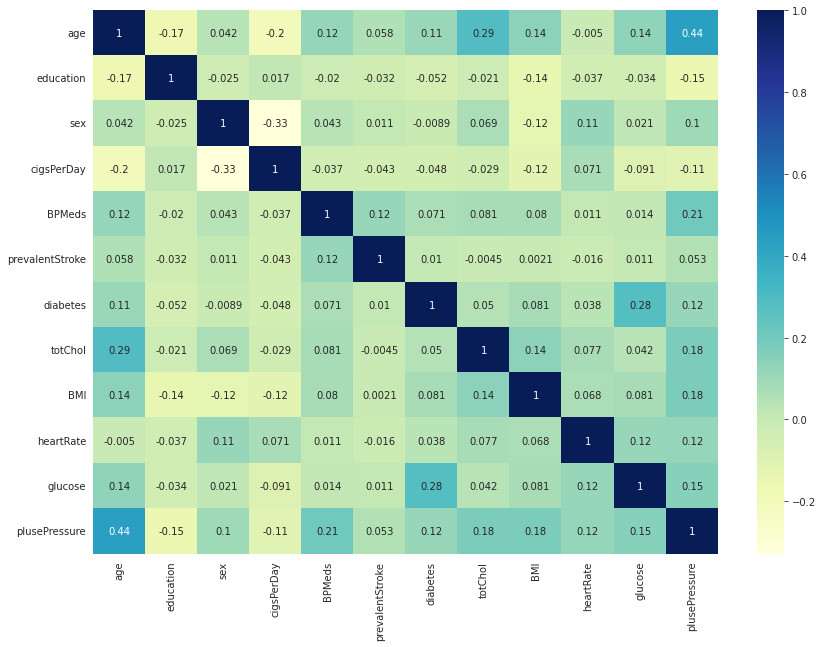

In [ ]:
# checking correlation between variables
X = ['age','education', 'sex', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'diabetes', 'totChol',
        'BMI', 'heartRate', 'glucose', 'plusePressure']

correlation_calc = df[X].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap='YlGnBu')

In [ ]:
df.drop(['prevalentHyp'],axis=1,inplace=True)

###Resampling of data as data is imbalanced

In [ ]:
X = df[['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
        'diabetes', 'totChol', 'BMI', 'heartRate','glucose','plusePressure']]
y = df['TenYearCHD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_train, y_train = tl.fit_resample(X_train, y_train)

In [ ]:
X_train.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,plusePressure
0,39.0,2.0,1.0,0.0,0.0,0.0,0.0,250.0,29.23,90.0,71.0,30.5
1,49.0,3.0,0.0,10.0,0.0,0.0,0.0,305.0,26.29,84.0,65.0,53.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,219.0,24.05,60.0,87.0,34.0
3,46.0,2.0,1.0,3.0,0.0,0.0,0.0,214.0,21.82,63.0,66.0,57.0
4,50.0,2.0,1.0,0.0,0.0,0.0,0.0,210.0,23.96,60.0,86.0,28.0


In [ ]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: TenYearCHD, dtype: int64

###Models Implementation for fitting the training data

####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

###Predictions and Evaluations

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.46      0.61       868
           1       0.19      0.74      0.30       149

    accuracy                           0.50      1017
   macro avg       0.55      0.60      0.46      1017
weighted avg       0.81      0.50      0.56      1017



In [ ]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[396 472]
 [ 38 111]]


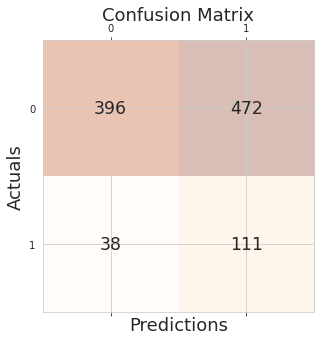

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))

Precision: 0.190
Recall: 0.745
Accuracy: 0.499


##Conclusion

1. Precision = 19%, means 19 percent of your predictions were correct.

2. Recall = 74%, means 74 percent of the positive cases model catch.

3. Accuracy = 50%, means model can predict sick people 50% of the time.

4. F1 score = 30 %, means 30 percent of positive predictions were correct.

###Training a Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

###Predictions and Evaluation of Decision Tree

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.69      0.78       868
           1       0.21      0.46      0.29       149

    accuracy                           0.66      1017
   macro avg       0.54      0.58      0.53      1017
weighted avg       0.78      0.66      0.70      1017



In [ ]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[602 266]
 [ 80  69]]


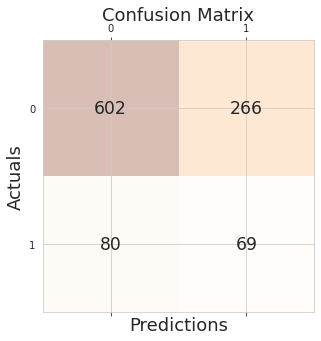

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))

Precision: 0.206
Recall: 0.463
Accuracy: 0.660


###Conclusion

1.Precision = 22%, means 22 percent of your predictions were correct.

2.Recall = 49 %, means 49 percent of the positive cases model catch.

3.Accuracy = 67%, means model can predict sick people 67% of the time.

4.F1 score = 30 %, means 30 percent of positive predictions were correct.

##Training the Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

####Predictions and Evaluation

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       868
           1       0.26      0.48      0.33       149

    accuracy                           0.72      1017
   macro avg       0.58      0.62      0.58      1017
weighted avg       0.80      0.72      0.75      1017



In [ ]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[659 209]
 [ 77  72]]


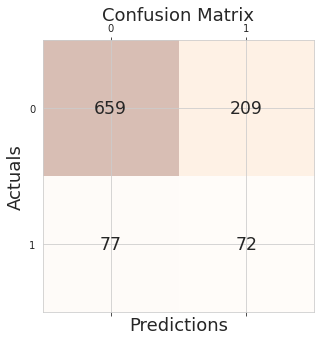

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))

Precision: 0.256
Recall: 0.483
Accuracy: 0.719


##Conclusion

1.Precision = 26%, means 26 percent of your predictions were correct.

2.Recall = 48 %, means 48 percent of the positive cases model catch.

3.Accuracy = 72%, means model can predict sick people 72% of the time.

4.F1 score = 34 %, means 34 percent of positive predictions were correct.

##Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(X_train,y_train)

SVC()

###Model Evaluation

In [ ]:
predictions = svc_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[384 484]
 [ 27 122]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.44      0.60       868
           1       0.20      0.82      0.32       149

    accuracy                           0.50      1017
   macro avg       0.57      0.63      0.46      1017
weighted avg       0.83      0.50      0.56      1017



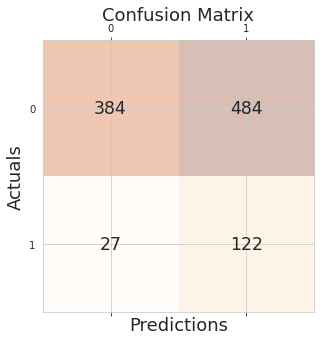

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))

Precision: 0.201
Recall: 0.819
Accuracy: 0.498


###Conclusion

1.Precision = 20%, means 20 percent of your predictions were correct.

2.Recall = 82 %, means 82 percent of the positive cases model catch.

3.Accuracy = 50%, means model can predict sick people 50% of the time.

4.F1 score = 32 %, means 32 percent of positive predictions were correct.

###Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.5s
[CV] END .....................................C=0.1, gamma=1; total time=   0.5s
[CV] END .....................................C=0.1, gamma=1; total time=   0.5s
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END .....................................C=0.1, gamma=1; total time=   0.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.7s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[384 484]
 [ 27 122]]


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.78      0.83       868
           1       0.20      0.32      0.25       149

    accuracy                           0.72      1017
   macro avg       0.54      0.55      0.54      1017
weighted avg       0.77      0.72      0.74      1017



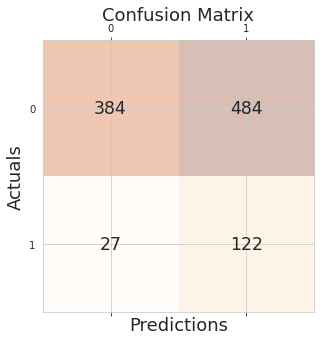

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))

Precision: 0.201
Recall: 0.819
Accuracy: 0.498


###Conclusion

Precision = 20%, means 20 percent of your predictions were correct.

Recall = 78 %, means 78 percent of the positive cases model catch.

Accuracy = 72%, means model can predict sick people 72% of the time.

F1 score = 25 %, means 25 percent of positive predictions were correct.

###Conclusion

Since our aim was to lower the false-negative value so that patients do not get detected improperly and are demonstrated to be safe, I used the recall score as the evaluation matrix. The patient's health may suffer greatly as a result of this.

Data were resampled because they weren't balanced. High accuracy can be achieved with imbalanced data, however, in these situations, recall, precision, and F1 score must be considered.

Used a KNN-imputer to perform missing value imputation, and processed data to remove outliers. To solve the issue of class imbalance, SMOTE boosting was used to over-sample the minority class observations.

Newer elements like pulse pressure, age bucket, and BMI bucket that helped to explain the separation in the Risk were created using the information from EDA.

Due to the parametric relationship in the data, a logistic regression model was implemented, and it was successful in achieving a Recall of 74%. Even though the recall score for SVM was 83 %, SVM is not an interpretable model, thus I chose an interpretable model for this situation.

All measures, including Precision, Recall, Accuracy, and F1 score were evaluated for each model.

Based on this analysis,

Logistic regression can identify positive cases with a 74% Recall.

Using a decision tree, positive cases may be predicted with a recall of 49%.

With the help of Random Forest, positive cases may be predicted with a 48% Recall.

Using a Support Vector Machine, positive cases can be predicted with an 82% Recall.

Using Grid Search CV, positive cases can be predicted with 78% Recall.